In [120]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [121]:
# Get MongoDB
mc = MongoClient()
db = mc["changeorg"]
petitions_col = db["featured_petitions"]

In [122]:
df = pd.DataFrame(list(petitions_col.find({})))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49013 entries, 0 to 49012
Columns: 155 entries, _id to user_country_us
dtypes: float64(4), int64(147), object(4)
memory usage: 58.0+ MB


In [4]:
df.head().T

,0,1,2,3,4
_id,57a3cd65d9ccb32809554867,57a3cd65d9ccb32809554868,57a3cd65d9ccb32809554869,57a3cd65d9ccb3280955486a,57a3cd65d9ccb3280955486b
ask_len,49,24,76,62,33
calculated_goal,100,100,1999,1500,100
comments_last_page,1,1,1,0,1
comments_likes,0,0,0,6,0
count_custom_targets,0,0,1,6,0
count_democrat_targets,0,1,6,0,1
count_group_targets,0,0,4,0,0
count_not_found_targets,0,0,0,0,0
count_past_responses,0,0,0,0,0


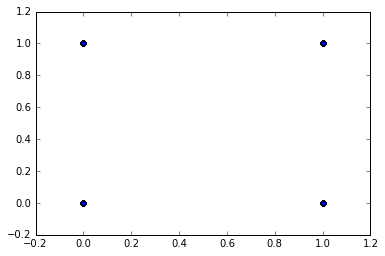

In [98]:
plt.scatter(df.comments_last_page, df.progress_and_victory)

In [6]:
df[ (df.progress < 10 )& (df.status == 1) & (df.is_verified_victory == 1)]["id"]

1906      330835
9312      815758
10658    1476245
11995     861006
15971    1097722
17794     379835
22525     606239
26519     660240
27654      37689
28736     343059
29276    2348181
29329    1325581
32060     850507
32699    1043270
32979    1174200
37351    1227925
44146    1452295
44325     367182
48538    1398443
48865    1020831
Name: id, dtype: int64

In [8]:
df["democrat_score"] = df.count_democrat_targets / (df.count_republican_targets + df.count_democrat_targets)

In [9]:
df["republican_score"] = df.count_republican_targets / (df.count_republican_targets + df.count_democrat_targets)

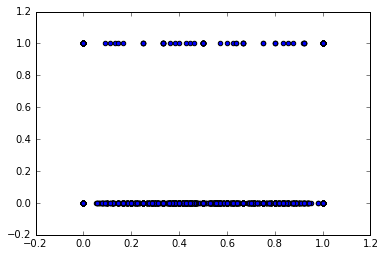

In [10]:
plt.scatter(df.democrat_score, df.is_verified_victory)

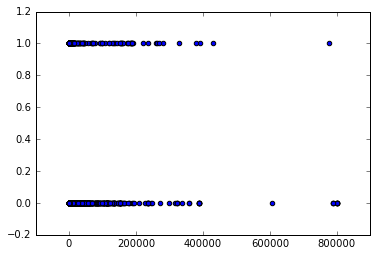

In [11]:
plt.scatter(df.displayed_signature_count, df.is_verified_victory)

In [12]:
df[df.status == 1].republican_score.mean()

0.4816831581510842

In [13]:
df[df.status == 1].democrat_score.mean()

0.5183168418489159

In [14]:
df[(df.is_verified_victory == 1) & (df.democrat_score >0.5)].is_verified_victory.sum()

101

In [15]:
df[(df.is_verified_victory == 1) & (df.republican_score >0.5)].status.sum()

84

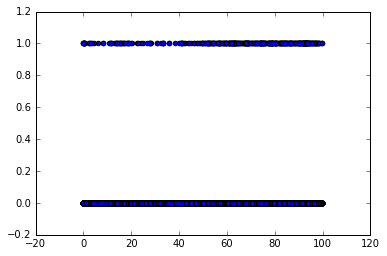

In [60]:
plt.scatter(df.progress, df.is_verified_victory)

In [70]:
df[(df.progress > 99) & (df.status ==0)][["is_verified_victory", "id"]
]

,is_verified_victory,id
685,0,2749681
1007,0,2159219
1069,0,2005845
2217,0,37915
4052,0,222572
4087,0,1142317
4235,0,334128
5196,0,3483005
5267,0,1608705
5457,0,1172460


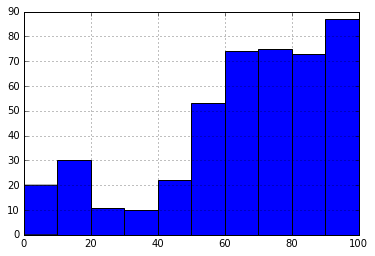

In [75]:
df.progress[df.is_verified_victory == 1].hist()

In [80]:
df[(df.progress < 10) & (df.is_verified_victory == 1)][["id", "my_progress", "progress", \
                                                        "calculated_goal", "displayed_signature_count"]]

,id,my_progress,progress,calculated_goal,displayed_signature_count
1906,330835,6.150000,6.150000,2000,123
9312,815758,0.103000,0.103000,100000,103
10658,1476245,0.306000,0.306000,100000,306
11995,861006,4.240000,4.240000,10000,424
15971,1097722,0.189000,0.189000,100000,189
17794,379835,3.660000,3.660000,10000,366
22525,606239,2.820000,2.820000,10000,282
26519,660240,0.000049,0.000049,270000000,133
27654,37689,2.470000,2.470000,10000,247
28736,343059,0.226000,0.226000,200000,452


In [92]:
df["progress_and_victory"] = (df.progress > 75) & (df.is_verified_victory == 1)

In [21]:
df["my_progress"]= df.displayed_signature_count/df.calculated_goal*100

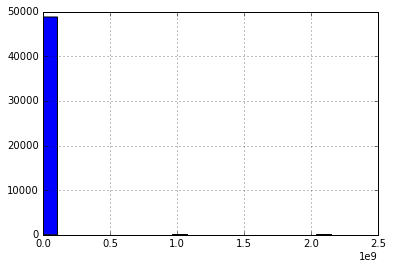

In [24]:
df.calculated_goal.hist(bins = 20)

In [35]:
df_1000_goal = df[df.calculated_goal <= 1000]

In [39]:
df_more_1000_goal = df[df.calculated_goal > 1000]
    
    

In [52]:
df_2015 = df[df.created_at_year >= 2015]

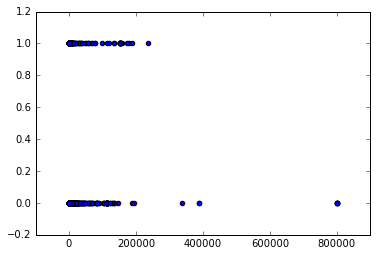

In [55]:
plt.scatter(df_2015.displayed_signature_count, df_2015.status)

In [57]:
df_2015[df_2015.displayed_signature_count > 500000]["id"]

2947     3097631
5872     2924591
9137     3206751
19161    2792316
34588    2568446
34841    2574836
Name: id, dtype: int64

In [58]:
df["high_progress"] = df.progress > 80

In [106]:
df = df[df["days_range_end_date"] > 0]

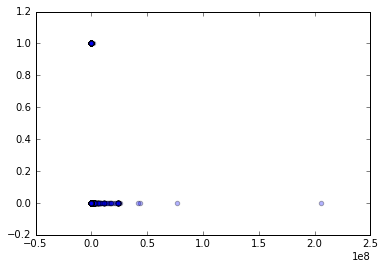

In [107]:
plt.scatter(df.goal_days_ratio, df.status, alpha = 0.3)

In [110]:
df[df.is_verified_victory == 1].goal_days_ratio.describe()

count    4.450000e+02
mean     5.337217e+03
std      7.524684e+04
min      4.098361e-01
25%      8.695652e+00
50%      3.703704e+01
75%      2.500000e+02
max      1.560694e+06
Name: goal_days_ratio, dtype: float64

In [111]:
df[df.is_verified_victory == 1].num_words_letter_body.describe()

count     445.000000
mean      202.858427
std       231.059468
min         2.000000
25%        36.000000
50%       153.000000
75%       283.000000
max      2361.000000
Name: num_words_letter_body, dtype: float64

In [112]:
df[df.is_verified_victory == 1].news_coverages.describe()

count    445.000000
mean       3.067416
std        4.460532
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       29.000000
Name: news_coverages, dtype: float64

In [115]:
df[df.is_verified_victory == 1].count_democrat_targets.describe()

count    445.000000
mean       0.833708
std        2.106240
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       15.000000
Name: count_democrat_targets, dtype: float64

In [116]:
df[df.is_verified_victory == 0].count_democrat_targets.describe()

count    47010.000000
mean         0.533270
std          1.873345
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        155.000000
Name: count_democrat_targets, dtype: float64

In [119]:
df[df.count_democrat_targets == 155]

,_id,ask_len,calculated_goal,comments_last_page,comments_likes,count_custom_targets,count_democrat_targets,count_group_targets,count_not_found_targets,count_past_responses,...,topic_socialentrepreneurship,topic_womensrights,tweets_followers,twitter_popularity,user_country_us,democrat_score,republican_score,my_progress,high_progress,progress_and_victory
4340,57a3cd68d9ccb3280955595b,68,100,1,0,4,155,2,0,16,...,0,0,0,0,1,0.95092,0.04908,15.0,False,False


In [101]:
df[df.is_verified_victory == 1].progress.mean()

65.54964133595733

## ask

Ask is a summary of what the petition is asking for. It is texts and has not Nans

## goal
Goal seems to be an attribute they used in the past, the most recent data has this field set to None. Calculated goal and calculated_goal_with_endorsers contains the same information, but the second one contains some NaNs.
We keep "calculated_goal" and drop the other 2

In [16]:
df[df["goal"].notnull()][["goal", "calculated_goal", "calculated_goal_with_endorsers"]].head()

,goal,calculated_goal,calculated_goal_with_endorsers
988,0.0,2500,2500.0
1015,0.0,7500,7500.0
1073,0.0,100,100.0
1075,0.0,100,100.0
1093,0.0,1000,1000.0


In [17]:
df.pop("goal")
df.pop("calculated_goal_with_endorsers")

0           100.0
1           100.0
2           100.0
3           100.0
4           100.0
5           100.0
6           100.0
7           100.0
8           100.0
9           100.0
10         2500.0
11          100.0
12         7500.0
13          100.0
14          100.0
15          100.0
16          100.0
17          100.0
18          200.0
19          500.0
20          100.0
21          100.0
22          100.0
23          100.0
24          100.0
25          100.0
26          100.0
27          100.0
28          100.0
29          100.0
           ...   
10055       100.0
10056     25000.0
10057       100.0
10058       200.0
10059       100.0
10060       100.0
10061     35000.0
10062       100.0
10063    200000.0
10064    200000.0
10065       100.0
10066       100.0
10067       100.0
10068     10000.0
10069       100.0
10070       100.0
10071       100.0
10072       100.0
10073       100.0
10074       100.0
10075       100.0
10076      1000.0
10077       100.0
10078      1000.0
10079     

## comments_last_page

comments last page is a boolean. This is a feature generated during the data scraping. Some petitions have over 20.000 pages of comments. Instead of counting all of the comments we put a maximum number of pages to scrape and stored a boolean indicating if it was the last page.

## comments_likes

comments_likes is the sum of the likes in the comments of the petition

## created_at and end_date

* created_at is the date when the petition was created. We need to set it to a datetime type instead of an object
* end_date is the date when the petition campaign ends

In [18]:
df["end_date"] = pd.to_datetime(df["end_date"])

In [19]:
df["created_at"] = pd.to_datetime(df["created_at"])

## creator_name

Name of the petition's creator. We drop it since we don't consider the information relevant

## creator_photo media photo video

creator_photo, media and photo is a dictionary with more information. There are some Nans. We keep it like that for now and will do some feature engineering creating a column that indicates if the creator has a photo

## description

Contains de description of the petition. Interesting to do some NLP after the data cleaning

## discoverable

Not sure what this column means, we keep it for now and see if it is significant.

In [20]:
df[df["discoverable"] == False].head().T

,1439,1666,1749,2262,2294
_id,579d989051f2b8a007220471,579d98fd51f2b8a0072207e2,579d992d51f2b8a0072208f6,579d99df51f2b8a007220e6a,579d99ea51f2b8a007220eb7
ask,Protect North Carolina residents from dangerou...,Tell the General Assembly you support high qua...,It’s Time for Commonsense Gun Safety Laws in O...,Demand a Vote on Life-Saving Background Checks,Repeal the law requiring Florida gambling faci...
calculated_goal,200,5000,15000,7500,100
comments_last_page,True,True,True,True,True
comments_likes,0,0,0,0,0
created_at,2015-04-20 18:00:28,2015-03-06 20:02:35,2015-03-07 00:10:33,2015-07-29 21:43:02,2015-04-02 19:23:01
creator_name,NORTH CAROLINA CONSERVATION NETWORK,Maryland Maternity Access Coalition,Americans for Responsible Solutions,Everytown for Gun Safety,Marilyn Varnberg
creator_photo,{u'url': u'photos/1/kn/ym/SNKNYMkCKYrEQeo-full...,{u'url': u'photos/4/rk/rs/pHrKrSJahrCPxMt-full...,{u'url': u'photos/9/za/iv/EdZAIvojSrccuoS-full...,{u'url': u'photos/1/vp/js/tsvpjSIeIRKfXcE-full...,NaN
description,<p>Tell U.S. Senators Richard Burr and Thom Ti...,<p>Tell the Maryland General Assembly you supp...,<p>Our gun laws are not doing enough to protec...,<p>Another movie theater shooting. Another nig...,<p>More than half of the greyhound races held ...
discoverable,False,False,False,False,False


## display_title and title and petition_title

As with the goal, title and petition_title seems to be an attribute used in the past, there are a lot of Nan and the ones that contain information have the same information as display_title. So we keep display_title

In [21]:
df[df["title"].notnull()][["display_title", "title", "petition_title"]].head()

,display_title,title,petition_title
1,"Federated States of Micronesia State Senate, M...","Federated States of Micronesia State Senate, M...","Federated States of Micronesia State Senate, M..."
2,Barack Obama: that the blacklivematter group n...,Barack Obama: that the blacklivematter group n...,Barack Obama: that the blacklivematter group n...
5,Pennsylvania State House: Members of the PA Ho...,Pennsylvania State House: Members of the PA Ho...,Pennsylvania State House: Members of the PA Ho...
6,"city of Thorton, People for the Ethical Treatm...","city of Thorton, People for the Ethical Treatm...","city of Thorton, People for the Ethical Treatm..."
9,We Support Apple vs FBI NO BACKDOOR,We Support Apple vs FBI NO BACKDOOR,We Support Apple vs FBI NO BACKDOOR


In [22]:
df.pop("title")

0                                                     None
1        Federated States of Micronesia State Senate, M...
2        Barack Obama: that the blacklivematter group n...
3                                                     None
4                                                     None
5        Pennsylvania State House: Members of the PA Ho...
6        city of Thorton, People for the Ethical Treatm...
7                                                     None
8                                                     None
9                      We Support Apple vs FBI NO BACKDOOR
10       Cyndi Stevenson, Travis Hutson, Florida Govern...
11       Joe Donnelly: Stop Carrier from moving jobs to...
12       President Obama, share your vision for drug po...
13                                                    None
14                          congresistas: Un cambio social
15                        Karen Bass: Testing the Platform
16       Stand up for Traditional Marriage's (man and w.

In [23]:
df.pop("petition_title")

0        CARTA A\nDiana María Guillén #Senasa\nVicepres...
1        Federated States of Micronesia State Senate, M...
2        Barack Obama: that the blacklivematter group n...
3                      Mi Apoyo que se celebre otro juicio
4                              to shutdown cartoon network
5        Pennsylvania State House: Members of the PA Ho...
6        city of Thorton, People for the Ethical Treatm...
7        Que las medidas adoptadas no trasgredan la int...
8                                        Lets have school.
9                      We Support Apple vs FBI NO BACKDOOR
10       Cyndi Stevenson, Travis Hutson, Florida Govern...
11       Joe Donnelly: Stop Carrier from moving jobs to...
12       President Obama, share your vision for drug po...
13       Que esos hermosos adorables animalitos no pier...
14                          congresistas: Un cambio social
15                        Karen Bass: Testing the Platform
16       Stand up for Traditional Marriage's (man and w.

## displayed_signature_count total_signature_count

Signature count. No Nans. Info seems to be redundant, but at some data points the info is slightly different. We keep displayed since it is the one showed.

In [24]:
df[df["total_signature_count"]!= df["displayed_signature_count"]][["displayed_signature_count", "total_signature_count", "status"]].head()

,displayed_signature_count,total_signature_count,status
81,14806,13566,victory
432,2891,2668,victory
494,19432,15815,victory
546,68842,35550,victory
718,68842,33243,victory


## displayed_supporter_count total_supporter_count

Contains some nans, so, since it is a count we will fill it with 0. Redundant info. We keep displayed.

In [25]:
df["displayed_supporter_count"].fillna(0, inplace=True) 

In [26]:
df[df["total_supporter_count"]!= df["displayed_supporter_count"]][["total_supporter_count", "displayed_supporter_count", "status"]].head()

,total_supporter_count,displayed_supporter_count,status
81,13566.0,14806.0,victory
272,NaN,0.0,closed
290,NaN,0.0,closed
318,NaN,0.0,closed
345,NaN,0.0,closed


In [27]:
df.pop("total_supporter_count")
df.pop("total_signature_count")

0            1
1            1
2            1
3            1
4            1
5           16
6           86
7            1
8            1
9            1
10        2419
11           1
12        5048
13           1
14           1
15           1
16          36
17           1
18         107
19         258
20           1
21          20
22           8
23          17
24           5
25           1
26           1
27           1
28          22
29           1
         ...  
10055        1
10056    17348
10057       19
10058      157
10059        7
10060        1
10061    33777
10062        1
10063    14405
10064    10105
10065       49
10066        1
10067        4
10068     9803
10069        1
10070        1
10071       28
10072        2
10073        0
10074        0
10075       12
10076      675
10077        1
10078      655
10079        2
10080       45
10081      335
10082        2
10083        1
10084      214
Name: total_signature_count, dtype: int64

## document_id

To drop, doesn't seem relevant

In [28]:
df.pop("document_id")

0        5590794
1        5597810
2        4091268
3        5803866
4        5600798
5        6303017
6        5589858
7        5905506
8        5700710
9        6103410
10       4091588
11       6005358
12       6206038
13       5601586
14       5915138
15       6303935
16       6105698
17       4091808
18       5812094
19       6011590
20       5605202
21       6207358
22       5926090
23       5700762
24       6305528
25       4094420
26       6117798
27       5700922
28       5814622
29       6012186
          ...   
10055    3465713
10056    3465701
10057    3471973
10058    3469385
10059    3388397
10060    3559042
10061    3477261
10062    3487553
10063      G5067
10064      G5067
10065    3565259
10066    3567219
10067    3569347
10068    3607591
10069    3579083
10070    3636684
10071    3638328
10072    3638356
10073    3639144
10074    3639644
10075    3739452
10076    3741075
10077    3643614
10078    3741087
10079    3739416
10080    3745715
10081    3744048
10082    37476

## endorsements and ensorser_count

endorsements was created during the data collection, contains the same information as endorser_count. But the second one contain Nans instead of 0's. We keep endorsements.

In [29]:
df[df["endorsements"]!= 0][["endorsements", "endorser_count", "status", "id"]].head()

,endorsements,endorser_count,status,id
202,4,4.0,victory,4221268
814,5,5.0,victory,4991122


## fb_popularity

Feature generated during data collection. It gets the Facebook Popularity of the petition url. Is the sum of 
        * number of likes of this URL
        * number of shares of this URL (this includes copy/pasting a link back to Facebook)
        * number of likes and comments on stories on Facebook about this URL
        * number of inbox messages containing this URL as an attachment.

In [30]:
df[df["fb_popularity"]!= 0][["fb_popularity", "status"]].head()

,fb_popularity,status


looks like we have a bug!

## id

is is the petition id

## is_organization organization

Info collected during the data scraping. Indicates if the petitioner is an organization. We drop organization's name

In [31]:
df.pop("organization")

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
5        {u'website': u'', u'verification_requested_at'...
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                     NaN
11                                                     NaN
12       {u'website': u'http://www.SchoolsNotPrisons.or...
13       {u'website': u'', u'verification_requested_at'...
14                                                     NaN
15                                                     NaN
16                                                     N

In [32]:
df[df["is_organization"]== True][["is_organization", "status"]].head()

,is_organization,status
5,True,closed
12,True,closed
13,True,closed
21,True,victory
49,True,victory


## is_pledge

It tells us if the petition is a pledge or not 

In [33]:
df[df["is_pledge"]== True][["is_pledge", "status"]].head()

,is_pledge,status
4135,True,closed
7749,True,closed


## is_verified_victory and is_victory

Info collected during web scraping

In [34]:
df[df["is_victory"]== True][["is_verified_victory", "is_victory"]].head()

,is_verified_victory,is_victory
6,False,True
16,False,True
18,False,True
21,False,True
44,False,True


## languages

Languages of the petition. It is a dictionary structure inside. Needs some feature engineering.

In [35]:
df["languages"].apply(lambda x: x[0]).unique()

array([u'es', u'en', u'pt', u'it', u'th', u'ja'], dtype=object)

## last_past_verified_victory_date last_past_victory_date last_update

Dates collected during initial data collection. Need to be converted to datetime

In [36]:
df["last_past_verified_victory_date"] = pd.to_datetime(df["last_past_verified_victory_date"])
df["last_past_victory_date"] = pd.to_datetime(df["last_past_victory_date"])
df["last_update"] = pd.to_datetime(df["last_update"])

## letter_body

Petitions have a letter attached that is the one that will be presented to the target. Needs feature engineering.

## links_fb_popularity

Similar to fb popularity but calculates the popularity of the links inside the text

In [37]:
df[df["links_fb_popularity"]== True][["links_fb_popularity", "status"]].head()

,links_fb_popularity,status


We have a bug

## milestones news_coverages num_comments num_past_petitions num_past_verified_victories num_past_victories num_responses num_tweets   


Info collected during web scraping. 

## original_locale

Locale of the petition. Keep.

In [38]:
df["original_locale"].unique()

array([u'es', u'en-US', u'es-419', u'en-GB', u'en-CA', u'pt-BR', u'it',
       u'th', u'es-AR', u'en-IN', u'en-AU', u'ja'], dtype=object)

In [39]:
df[((df["original_locale"] != 'en-US') & (df["status"]=="victory"))][["original_locale","status", "is_verified_victory","displayed_signature_count", "id"]]

,original_locale,status,is_verified_victory,displayed_signature_count,id
45,en-GB,victory,False,4,6139146
65,es,victory,False,3,6323426
82,es,victory,False,4,5708342
182,es,victory,False,1,5681030
284,es,victory,False,4,4267796
341,es,victory,False,84,4514691
374,pt-BR,victory,False,2,4518855
408,es,victory,False,2,6599630
471,es,victory,False,1,4638554
522,en-CA,victory,False,1,5016994


## primary_target targets

Contains the information of the primary target. We keep targets since there are all the targets included.

In [40]:
df.pop("primary_target")

0        {u'publicly_visible': False, u'slug': None, u'...
1        {u'publicly_visible': True, u'slug': u'federat...
2        {u'publicly_visible': True, u'slug': u'barack-...
3        {u'publicly_visible': False, u'slug': u'tom-ap...
4        {u'publicly_visible': False, u'slug': u'l-loui...
5        {u'publicly_visible': True, u'slug': u'pennsyl...
6        {u'publicly_visible': False, u'slug': u'city-o...
7        {u'publicly_visible': False, u'slug': u'andy-a...
8        {u'publicly_visible': False, u'slug': u'kasha-...
9        {u'publicly_visible': True, u'slug': u'u-s-hou...
10       {u'publicly_visible': False, u'slug': u'cyndi-...
11       {u'publicly_visible': False, u'slug': u'joe-do...
12       {u'publicly_visible': True, u'slug': u'barack-...
13       {u'publicly_visible': False, u'slug': u'elijah...
14       {u'publicly_visible': False, u'slug': u'congre...
15       {u'publicly_visible': False, u'slug': u'karen-...
16       {u'publicly_visible': False, u'slug': u'dan-hu.

## progress

Indicates the progress of the signature count. We keep it for now but will probably be dropped in the future.

## relevant_location and restricted_location

Contains info about the relevant location for the petition and if it is restricted. Needs feature engineering.

## slug

slug of the url for https://www.change.org/p/congress-pass-the-able-act the slug is congress-pass-the-able-act

## tags

Contains the tags of the petition. Needs feature engineering

## targeting_description

Info is redundant with targets. Drop.

In [41]:
df.pop("targeting_description")

0        CARTA A Diana María Guillén #Senasa Vicepresid...
1        Federated States of Micronesia State Senate, M...
2                                             Barack Obama
3                                              Tom Apodaca
4                                          L. Louise Lucas
5        Pennsylvania State House, Pennsylvania State S...
6        City of Thornton, People for the Ethical Treat...
7                                              Andy Anders
8                                             Kasha Kelley
9        U.S. House of Representatives, U.S. Senate, Ba...
10       Cyndi Stevenson, Travis Hutson, Florida Govern...
11                Joe Donnelly, Gregory Hayes, Chuck Jones
12                                            Barack Obama
13                                         Elijah Cummings
14                                            congresistas
15                                              Karen Bass
16                                             Dan Huber

## topic

It has a lot of Nans, we keep it for now but I think it will be redundant with tags or NLP. Needs feature engineering.

## tweets_followers

number of followers of the embedded tweets

In [42]:
df[df["tweets_followers"]> 0][["tweets_followers", "status"]].head()

,tweets_followers,status
81,36857,victory
114,11407,victory
139,7822,victory
155,4301,closed
202,2149688,victory


## twitter_popularity

count of likes and shares of embedded tweets

In [43]:
df[df["twitter_popularity"]> 0][["twitter_popularity", "status"]].head()

,twitter_popularity,status
155,1,closed
202,365,victory
355,4356,victory
415,10,closed
500,38,victory


## victory_description victory_date weekly_signature_count photo_id

Drop.

In [44]:
df.pop("victory_description")
df.pop("victory_date")
df.pop("weekly_signature_count")
df.pop("photo_id")

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
         ..
10055   NaN
10056   NaN
10057   NaN
10058   NaN
10059   NaN
10060   NaN
10061   NaN
10062   NaN
10063   NaN
10064   NaN
10065   NaN
10066   NaN
10067   NaN
10068   NaN
10069   NaN
10070   NaN
10071   NaN
10072   NaN
10073   NaN
10074   NaN
10075   NaN
10076   NaN
10077   NaN
10078   NaN
10079   NaN
10080   NaN
10081   NaN
10082   NaN
10083   NaN
10084   NaN
Name: photo_id, dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10085 entries, 0 to 10084
Data columns (total 52 columns):
_id                                10085 non-null object
ask                                10085 non-null object
calculated_goal                    10085 non-null int64
comments_last_page                 10085 non-null bool
comments_likes                     10085 non-null int64
created_at                         10085 non-null datetime64[ns]
creator_name                       10085 non-null object
creator_photo                      6407 non-null object
description                        10085 non-null object
discoverable                       10085 non-null bool
display_title                      10085 non-null object
displayed_signature_count          10085 non-null int64
displayed_supporter_count          10085 non-null float64
end_date                           10085 non-null datetime64[ns]
endorsements                       10085 non-null int64
endorser_count              

In [46]:
df.shape

(10085, 52)

In [47]:
df.head().T

,0,1,2,3,4
_id,579d958f51f2b8a00721ed50,579d958f51f2b8a00721ed56,579d958f51f2b8a00721ed57,579d958f51f2b8a00721ed59,579d959051f2b8a00721ed5d
ask,CARTA A\nDiana María Guillén #Senasa\nVicepres...,S,that the blacklivematter group no longer be al...,Mi Apoyo que se celebre otro juicio,to shutdown cartoon network
calculated_goal,100,100,100,100,100
comments_last_page,True,True,True,True,True
comments_likes,0,0,0,0,0
created_at,2016-01-20 17:00:13,2016-01-21 07:15:46,2015-08-29 15:45:18,2016-02-03 08:00:27,2016-01-21 14:00:15
creator_name,Laura Ferreyra,Ms Me,michael lacey,silvia yolanda gomara corredera,louis alves
creator_photo,{u'url': u'photos/7/ym/fw/qTYMFWijKULoeFi-full...,{u'url': u'photos/2/cw/cl/nHCwCldKUmQRjVx-full...,{u'url': u'photos/8/tm/lf/XFTmlFTUGreDcLr-full...,{u'url': u'photos/7/jc/il/rgJcilbQywzZouF-full...,{u'url': u'photos/1/rp/bd/ijrpbdzvaakbPgk-full...
description,<p>CARTA A<br>Diana María Guillén #Senasa<br>V...,Tg,<p>.</p>,Yo me alegraría y toda España y sobretodo sus ...,<p>shutdown cartoon network complely</p>
discoverable,True,True,True,True,True


------------------------

In [48]:
def relevant_country(location):
    if location is not None:
        return location["country_code"]
    else:
        return None

In [49]:
df["relevant_country"]=df["relevant_location"].apply(lambda x: relevant_country(x))

In [189]:
    def relevant_state(location):
        if location is not None:
            return location["state_code"]
        else:
            return None

In [191]:
df["relevant_state"] = df["relevant_location"].apply(lambda x: relevant_state(x))

In [194]:
df["user_country"] = df["user"].apply(lambda x: x["country_code"])

In [195]:
df["user_state"] = df["user"].apply(lambda x: x["state_code"])

In [198]:
df[df["relevant_state"].isnull()].count()

_id                                9770
ask                                9770
calculated_goal                    9770
comments_last_page                 9770
comments_likes                     9770
created_at                         9770
creator_name                       9770
creator_photo                      6152
description                        9770
discoverable                       9770
display_title                      9770
displayed_signature_count          9770
displayed_supporter_count          9770
end_date                           9770
endorsements                       9770
endorser_count                     9243
fb_popularity                      9770
id                                 9770
is_organization                    9770
is_pledge                          9770
is_verified_victory                9770
is_victory                         9770
languages                          9770
last_past_verified_victory_date      48
last_past_victory_date              127


In [125]:
def target_states(targets):
    states = []
    titles = []
    names = []
    for target in targets:
        if target["type"] == "Politician":
            states.append(target["additional_data"]["state"])
            titles.append(target["additional_data"]["title"])
            names.append(target["display_name"])
    return states, titles, names

In [126]:
df["targets"].apply(lambda x: target_states(x))

0                   ([NC], [Representative], [Alma Adams])
1                    ([None], [President], [Barack Obama])
2                    ([None], [President], [Barack Obama])
3                   ([NC], [State Senator], [Tom Apodaca])
4        ([VA, NC], [State Senator, State Senator], [L....
5                                             ([], [], [])
6                  ([CO], [Governor], [John Hickenlooper])
7            ([LA], [State Representative], [Andy Anders])
8           ([KS], [State Representative], [Kasha Kelley])
9                    ([None], [President], [Barack Obama])
10       ([FL, FL, FL, FL], [State Representative, Stat...
11                       ([IN], [Senator], [Joe Donnelly])
12                   ([None], [President], [Barack Obama])
13             ([MD], [Representative], [Elijah Cummings])
14         ([WA], [State Representative], [Sharon Santos])
15                  ([CA], [Representative], [Karen Bass])
16           ([TX], [State Representative], [Dan Huberty

In [148]:
d = {
    "city": "Washington",
    "country_code": "US",
    "lat": None,
    "lng": None,
    "state_code": "DC",
    "google_places_id": None,
    "photo_id": None
  }

In [71]:
df["topic"].unique()

array([u'environment', u'humanrights', None, u'criminaljustice',
       u'economicjustice', u'animals', u'health', u'education',
       u'gayrights', u'immigration', u'womensrights', u'',
       u'humantrafficking', u'food', u'socialentrepreneurship',
       u'globalpoverty', u'race', u'homelessness'], dtype=object)

In [233]:
df[["targets", "id"]].head()


,targets,id
0,"[{u'publicly_visible': False, u'slug': None, u...",5590794
1,"[{u'publicly_visible': True, u'slug': u'federa...",5597810
2,"[{u'publicly_visible': True, u'slug': u'barack...",4091268
3,"[{u'publicly_visible': False, u'slug': u'tom-a...",5803866
4,"[{u'publicly_visible': False, u'slug': u'l-lou...",5600798


# removing trolls

In [66]:
df[(df['status'] == "closed") | ((df['status'] =="victory") & (df['displayed_signature_count'] >100))].T

,0,1,2,3,4,5,7,8,9,10,...,10075,10076,10077,10078,10079,10080,10081,10082,10083,10084
_id,579d958f51f2b8a00721ed50,579d958f51f2b8a00721ed56,579d958f51f2b8a00721ed57,579d958f51f2b8a00721ed59,579d959051f2b8a00721ed5d,579d959051f2b8a00721ed5f,579d959051f2b8a00721ed5c,579d959051f2b8a00721ed63,579d959051f2b8a00721ed61,579d959051f2b8a00721ed65,...,579e1d43a7c4008cc957c62f,579e1d48a7c4008cc957c630,579e1d3ba7c4008cc957c62d,579e1d4ea7c4008cc957c631,579e1d41a7c4008cc957c62e,579e1d55a7c4008cc957c633,579e1d52a7c4008cc957c632,579e1d57a7c4008cc957c634,579e1d59a7c4008cc957c635,579e1d38a7c4008cc957c62c
ask,CARTA A\nDiana María Guillén #Senasa\nVicepres...,S,that the blacklivematter group no longer be al...,Mi Apoyo que se celebre otro juicio,to shutdown cartoon network,Members of the PA House and Senate: refuse yo...,Que las medidas adoptadas no trasgredan la int...,Lets have school.,We Support Apple vs FBI NO BACKDOOR,Lindy and Amanda's law: Create stricter laws t...,...,Change the Laws of Presidency,IMPEACH OBAMA,Impeach President Barack Obama,Provide air conditioning to Texas Inmates,Make desecretion of the US FLAG Illegal,To make a skatepark at academy field,Don't Let Congress Take Away One of the Strong...,Remove Martin Luther King Jr.'s name from all ...,britany,We are asking you to block the parking of the ...
calculated_goal,100,100,100,100,100,100,100,100,100,2500,...,100,1000,100,1000,100,100,500,100,100,500
comments_last_page,True,True,True,True,True,True,True,True,True,False,...,True,False,True,False,True,True,True,True,True,True
comments_likes,0,0,0,0,0,1,0,0,0,1,...,1,116,0,32,0,0,0,0,0,6
created_at,2016-01-20 17:00:13,2016-01-21 07:15:46,2015-08-29 15:45:18,2016-02-03 08:00:27,2016-01-21 14:00:15,2016-03-01 00:46:51,2016-02-08 15:30:12,2016-01-27 21:18:30,2016-02-18 02:02:40,2015-08-29 16:29:51,...,2015-07-12 17:13:05,2015-07-13 02:54:09,2015-06-25 15:54:57,2015-07-13 03:01:03,2015-07-12 17:07:44,2015-07-14 03:38:38,2015-07-13 18:45:19,2015-07-14 14:29:48,2015-07-15 19:04:27,2015-06-25 02:09:08
creator_name,Laura Ferreyra,Ms Me,michael lacey,silvia yolanda gomara corredera,louis alves,Concerned Citizen of Pennsylvania,Orlando Farrago,katherine portillo,Tom Mahoney,Ken Neikirk,...,Change the Laws of Presidency - Nicholas Grant,Valerie Grimes,Logan NoLastNameForYou,Angie Clark-Bobo,Pamela Berry,Jacob Phelps,Connecticut Senate Democrats,Franklin Dogooder,Brit Madden,Barbara Taylor
creator_photo,{u'url': u'photos/7/ym/fw/qTYMFWijKULoeFi-full...,{u'url': u'photos/2/cw/cl/nHCwCldKUmQRjVx-full...,{u'url': u'photos/8/tm/lf/XFTmlFTUGreDcLr-full...,{u'url': u'photos/7/jc/il/rgJcilbQywzZouF-full...,{u'url': u'photos/1/rp/bd/ijrpbdzvaakbPgk-full...,{u'url': u'photos/1/ud/ie/FQUDiEaFECibmIo-full...,NaN,NaN,{u'url': u'photos/7/oc/pm/NwoCpmJLOphGJrl-full...,{u'url': u'photos/0/db/yf/gaDBYftmeqlrgiw-full...,...,{u'url': u'photos/9/fh/jr/xEFhJriZbufAAOq-full...,{u'url': u'photos/0/zu/uq/FFzUUQMGaTNwBmO-full...,NaN,{u'url': u'photos/5/oy/zc/WbOYZCCEvDxOHBb-full...,{u'url': u'photos/5/st/fs/XWstFsnDsGQtLUy-full...,NaN,{u'url': u'photos/1/yc/gn/TWyCGnaOBHwWdoi-full...,NaN,{u'url': u'photos/6/dv/vh/oUDvVhmTSwKHwdX-full...,{u'url': u'photos/7/ms/yd/uZMSydlAqrMytzx-full...
description,<p>CARTA A<br>Diana María Guillén #Senasa<br>V...,Tg,<p>.</p>,Yo me alegraría y toda España y sobretodo sus ...,<p>shutdown cartoon network complely</p>,"When we don't do our jobs, we don't get paid!...",Que La interpretación de los actos no sean par...,I want there to be school because if there isn...,"<p>On Feb 16, 2015 a federal judge ordered App...",<p>Lindy and Amanda's Law</p>\n<p> </p>\n<p>It...,...,<p>All Americans whether immigrants or adopted...,Since he has taken office the country has gone...,He is the worst mistake this country has ever ...,<p><strong>Since 2007 at least 14 prisoner dea...,<p>Men and women gave their lives to protect t...,So you don't have to drive a long time to a sk...,"<p>Here in Connecticut, we know that our perso...",This is important 

In [130]:
df = df[df.days_range_end_date >0]

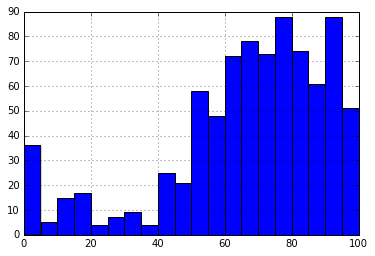

In [131]:
df[(df.status == 1)].progress.hist(bins = 20)


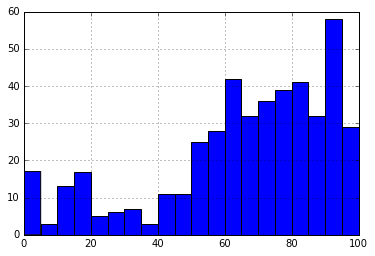

In [129]:
df[(df.is_verified_victory == 1)].progress.hist(bins = 20)
